## Imports

In [21]:
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt

## Settings

In [22]:
imdir = '/home/drevital/obstacles_classification_datasets/rgb_6/train/obstacle'
imname = '32_637_.81_2021-08-17--18-09-44_.jpg'
threshold = 60

# Read image & separate it to <ref, current>

In [23]:
imrgb = cv2.imread(os.path.join(imdir, imname))
im = cv2.cvtColor(imrgb, cv2.COLOR_BGR2RGB)        
w = im.shape[1]
ref = im[:, :w//2]
current = im[:, w//2:]

## Generate diff & mask images

### Mask Configuration

In [24]:
factor = 1280/720
erode_filter_size = [3, 3]
dilate_filter_size = [15, 15]

### Mask Utilities

In [25]:
def adjust_filter_by_res(filter_to_adjust):
    # check minimum filter size
    if int(filter_to_adjust[0]*factor) < 3 or int(filter_to_adjust[1]*factor) < 3:
        return (3, 3)
    else:
        return (int(filter_to_adjust[0]*factor), int(filter_to_adjust[1]*factor))

### Mask Generation

In [26]:
diff = cv2.absdiff(current, ref)
agg_rgb = np.stack((diff[:, :, 0], diff[:, :, 1], diff[:, :, 2])).max(0)
_, mask = cv2.threshold(agg_rgb, threshold, 255, cv2.THRESH_BINARY)

# New morphological operations
erode_filter_size = adjust_filter_by_res(erode_filter_size)
dilate_filter_size = adjust_filter_by_res(dilate_filter_size)
_erod = cv2.erode(mask, np.ones(erode_filter_size, np.uint8), iterations=1)
mask = cv2.dilate(_erod, np.ones(dilate_filter_size, np.uint8), iterations=2)
 
mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)        

## Concatenate <ref, current, mask> for training

In [27]:
concat = cv2.hconcat([ref, current, mask])

## Display concatenated image

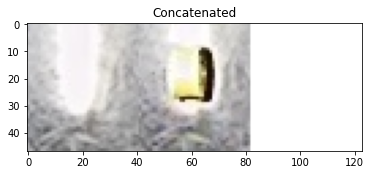

In [28]:
plt.imshow(concat)
plt.title('Concatenated')
plt.show()

In [29]:
concat.shape

(47, 123, 3)

In [30]:
concat[2][:10]

array([[184, 183, 188],
       [205, 204, 209],
       [207, 207, 209],
       [208, 208, 210],
       [209, 209, 211],
       [216, 216, 218],
       [222, 222, 222],
       [223, 223, 223],
       [222, 222, 222],
       [229, 229, 229]], dtype=uint8)